# Neural Network & Fuzzy Systems Project
# Image Classification & Model Comparison Using Different Deep Learning Techniques
## Name: Md. Saiful Bari Siddiqui
## Student ID : Not Yet Given

### Importing Necessary Packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Loading Fashion Mnist Dataset

In [2]:
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


## Data Preprocessing

In [3]:
# Reshaping data
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)
num_classes = 10

# Normalizing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## DL Model Designing

## CNN with 3 2XConvolutional & Maxpooling Layers

In [8]:
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28X28 with 1 byte color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu',  kernel_initializer='he_uniform'), 
    # 10 output neuron. It will contain a value from 0-9 for each digits
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

## Model Compilation

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [11]:
hist = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 6s 15ms/step - loss: 1.6818 - accuracy: 0.4009 - val_loss: 1.3852 - val_accuracy: 0.5140
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 1.1259 - accuracy: 0.6021 - val_loss: 1.0789 - val_accuracy: 0.6184
Epoch 3/10
391/391 [==============================] - 6s 15ms/step - loss: 0.8651 - accuracy: 0.6983 - val_loss: 0.8636 - val_accuracy: 0.6973
Epoch 4/10
391/391 [==============================] - 6s 15ms/step - loss: 0.6900 - accuracy: 0.7618 - val_loss: 0.9683 - val_accuracy: 0.6715
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 0.5510 - accuracy: 0.8079 - val_loss: 0.9504 - val_accuracy: 0.6943
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 0.4308 - accuracy: 0.8475 - val_loss: 0.9173 - val_accuracy: 0.7164
Epoch 7/10
391/391 [==============================] - 6s 15ms/step - loss: 0.3311 - accuracy: 0.8845 - val_loss: 0.7830 - val_accuracy: 0.7652

## Model Evaluation

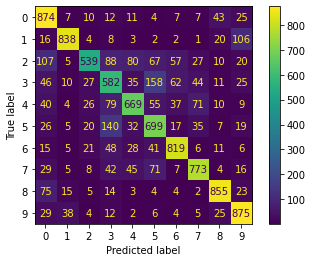

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(x_test)
y_pred=np.argmax(pred,axis=1)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, accuracy_score

y_pred_proba = model.predict(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.9644504277777777
Cohen_Kappa Score: 0.7247777777777777
F1 Score: 0.7506890025545385
Matthews Correlation Coefficient: 0.7256676532964128
Log Loss: 1.0707373828515188
Accuracy: 0.7523


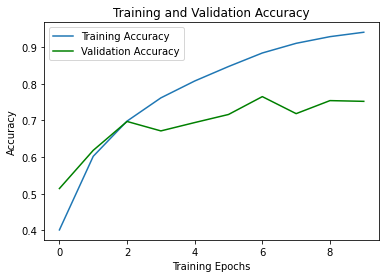

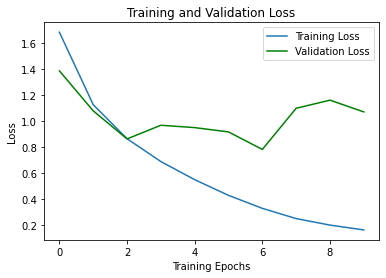

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'accuracy' ]
val_acc  = hist.history[ 'val_accuracy' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('Accuracy DIP.pdf')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

plt.savefig('Loss DIP.pdf')

## Visualization of Layer Outputs

C:\Users\USER\AppData\Local\Temp/ipykernel_7160/911793021.py:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


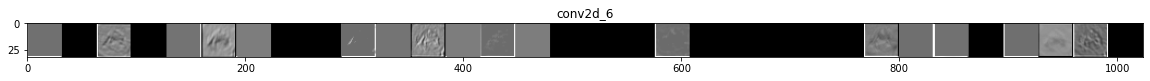

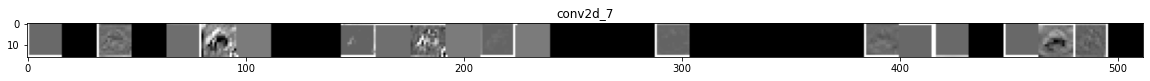

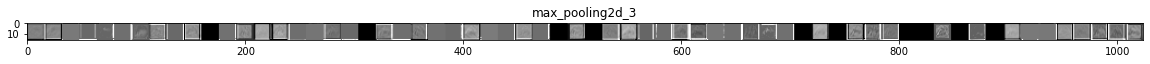

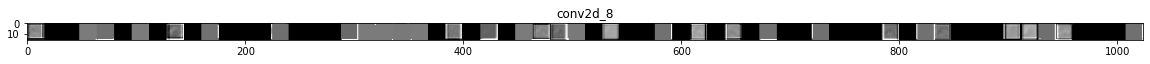

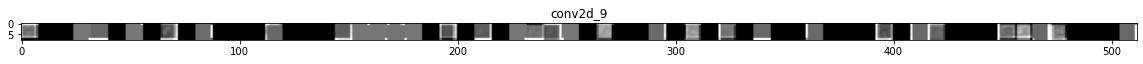

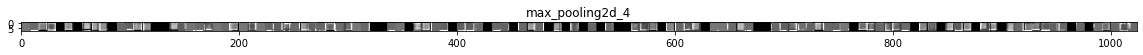

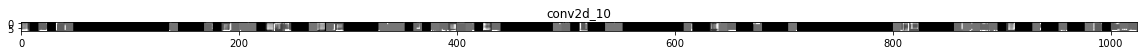

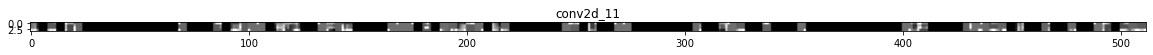

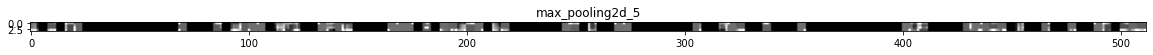

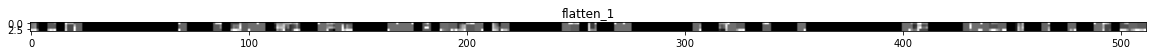

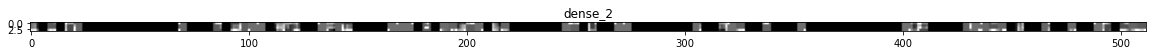

In [15]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[0,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 

## Feed Forward DNN Model with 2 Hidden Layers

In [16]:
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    # Flatten the inputs to feed into a DNN
    tf.keras.layers.Flatten(input_shape=input_shape), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each digits
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


## Model Compilation

In [47]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [48]:
hist = model.fit(x_train, y_train, epochs = epochs, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9354 - accuracy: 0.3098 - val_loss: 1.8848 - val_accuracy: 0.3232
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7030 - accuracy: 0.3916 - val_loss: 1.6587 - val_accuracy: 0.3996
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6379 - accuracy: 0.4169 - val_loss: 1.5996 - val_accuracy: 0.4340
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5992 - accuracy: 0.4330 - val_loss: 1.5988 - val_accuracy: 0.4324
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5832 - accuracy: 0.4418 - val_loss: 1.6773 - val_accuracy: 0.4085
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5665 - accuracy: 0.4472 - val_loss: 1.5497 - val_accuracy: 0.4387
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5566 - accuracy: 0.4527 - val_loss: 1.5505 - val_accuracy:

## Model Evaluation

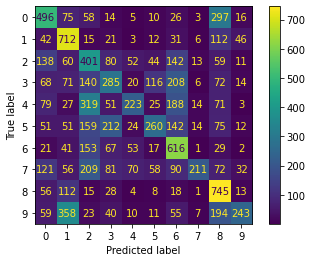

In [49]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [50]:
y_pred_proba = model.predict(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.85429435
Cohen_Kappa Score: 0.3546666666666668
F1 Score: 0.40001688435249544
Matthews Correlation Coefficient: 0.36022917307262814
Log Loss: 1.6568196138356979
Accuracy: 0.4192


Text(0, 0.5, 'Loss')

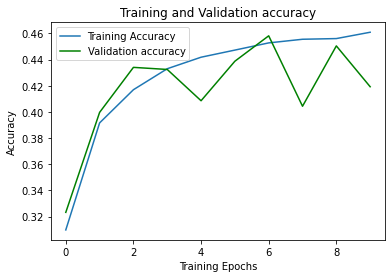

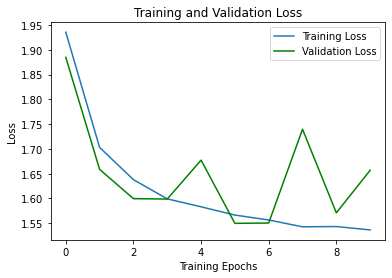

In [51]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'accuracy' ]
val_acc  = hist.history[ 'val_accuracy' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation accuracy')
plt.legend(['Training Accuracy','Validation accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

## Visualization of layers

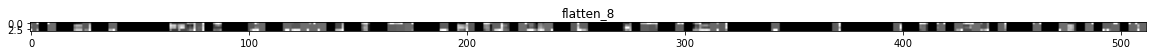

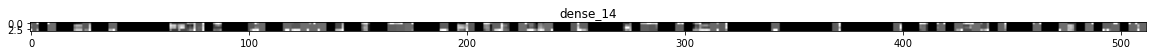

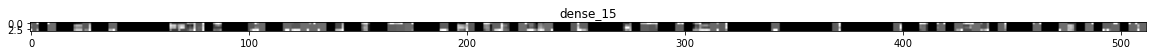

In [52]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[47,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 

## CNN with 2 Convolutional & Maxpooling Layers

In [18]:
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28X28 with 1 byte color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each classes
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

## Model Compilation

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [21]:
hist = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 1.6966 - accuracy: 0.3901 - val_loss: 1.3210 - val_accuracy: 0.5314
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.2680 - accuracy: 0.5536 - val_loss: 1.1083 - val_accuracy: 0.6153
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0559 - accuracy: 0.6301 - val_loss: 1.1434 - val_accuracy: 0.5935
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 0.9027 - accuracy: 0.6845 - val_loss: 0.9120 - val_accuracy: 0.6809
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.7852 - accuracy: 0.7276 - val_loss: 0.9650 - val_accuracy: 0.6862
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.6788 - accuracy: 0.7644 - val_loss: 0.8846 - val_accuracy: 0.7007
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.5884 - accuracy: 0.7953 - val_loss: 0.8259 - val_accuracy: 0.7260

## Model Evaluation

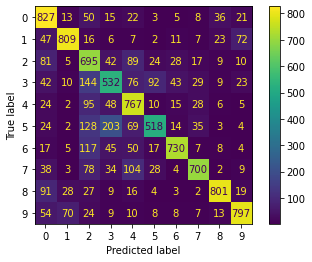

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(x_test)
y_pred=np.argmax(pred,axis=1)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, accuracy_score

y_pred_proba = model.predict(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.9613772666666668
Cohen_Kappa Score: 0.6862222222222223
F1 Score: 0.719801943933043
Matthews Correlation Coefficient: 0.6877170025780037
Log Loss: 0.9485339538130887
Accuracy: 0.7176


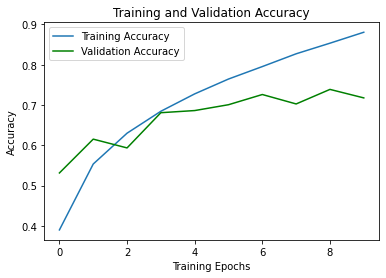

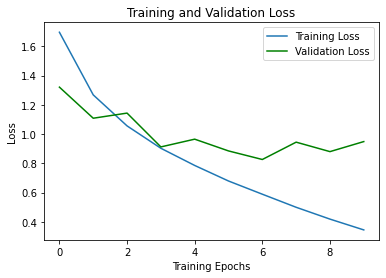

In [24]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'accuracy' ]
val_acc  = hist.history[ 'val_accuracy' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('Accuracy DIP.pdf')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

plt.savefig('Loss DIP.pdf')